In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/Mall_Customers (1).csv')

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
df.drop(columns=['CustomerID'],inplace=True)

In [11]:
df.shape

(200, 4)

In [12]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
# Renaming the Gender column values for better readability
df = df.rename(columns={'Genre': 'Gender'})
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [14]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


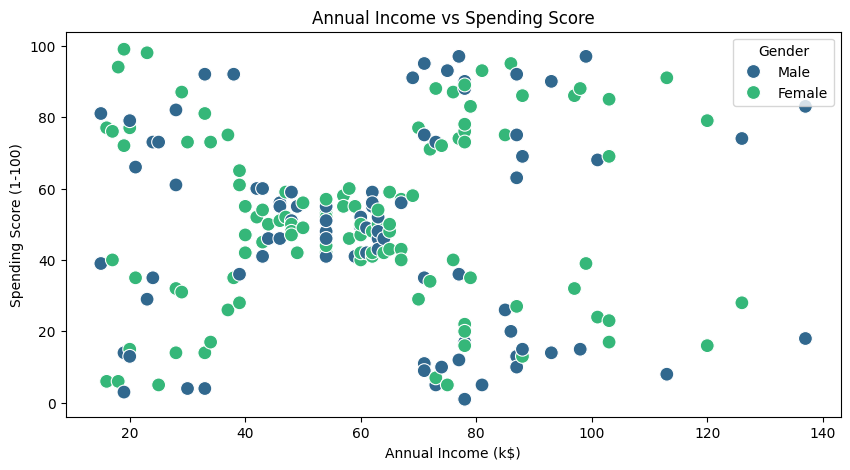

In [15]:
# Relationship between annual income and spending score
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', palette='viridis', s=100, hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


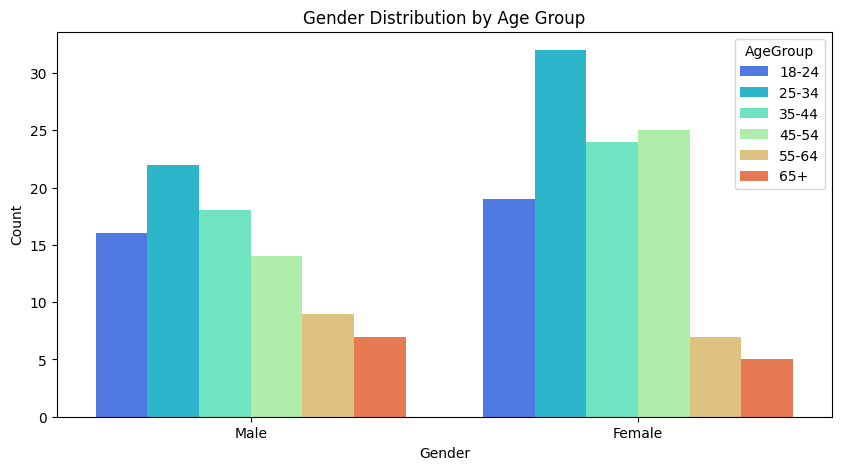

In [16]:
# Create Age Groups
age_bins = [18, 25, 35, 45, 55, 65, 70]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender', hue='AgeGroup', palette='rainbow')
plt.title('Gender Distribution by Age Group')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,Male,19,15,39,18-24
1,Male,21,15,81,18-24
2,Female,20,16,6,18-24
3,Female,23,16,77,18-24
4,Female,31,17,40,25-34


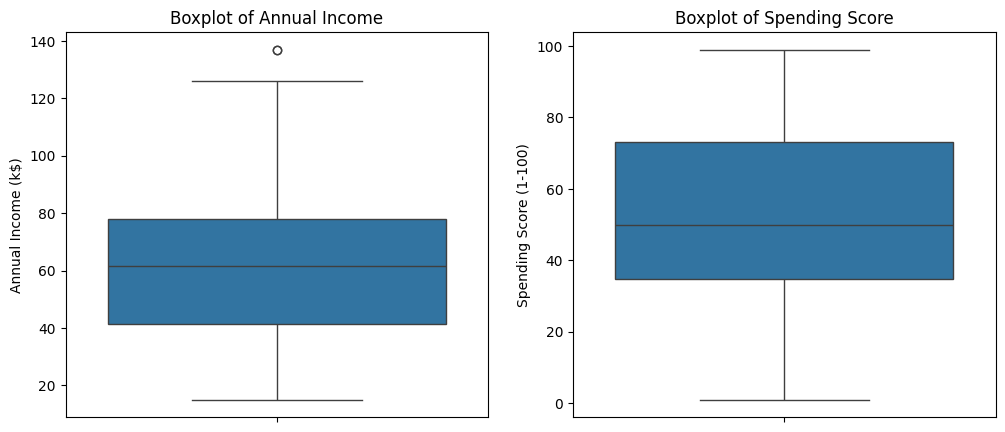

In [19]:
# Detection of outliers
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')
plt.show()

In [21]:
from sklearn.cluster import KMeans
data = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
#  Finding the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

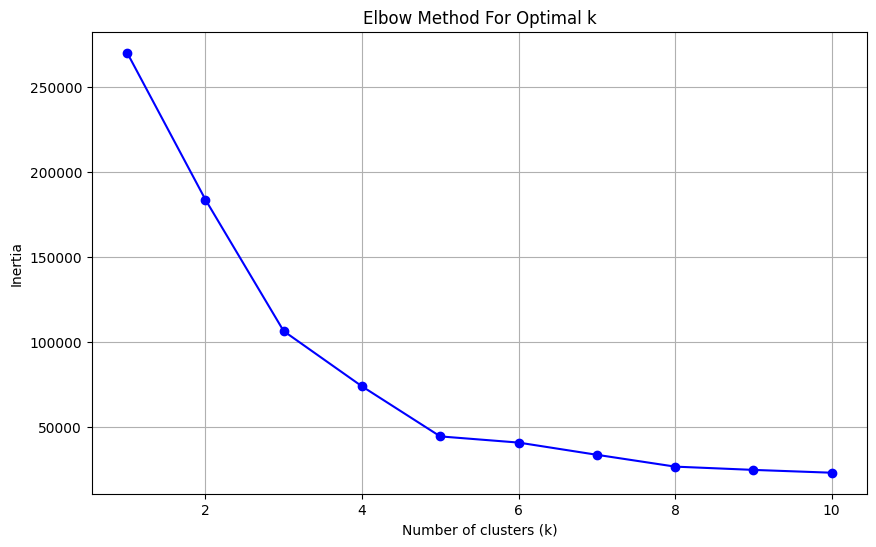

In [22]:
# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [23]:
# Applying KMeans Clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)
df['Cluster'] = kmeans.labels_
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


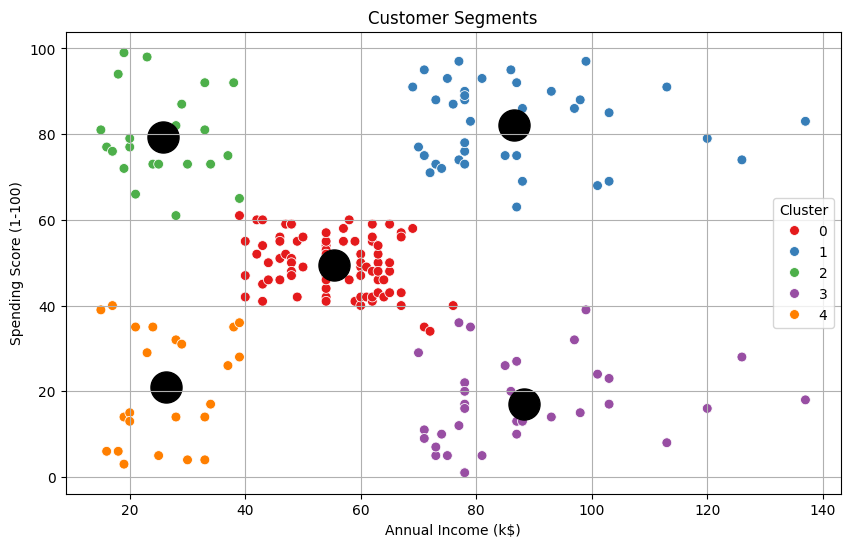

In [24]:
# plotting the clusters and visualizing centeriods
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, c='black', marker='o', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.grid(True)
plt.show()

In [26]:
# Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score(data, kmeans.labels_)
print(f'Silhouette Score for k={optimal_k}: {score}')

Silhouette Score for k=5: 0.553931997444648


In [27]:
import joblib

# Save model
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']